### Exploratory Data Analysis & Feature Engineering

Before being able to train and test our machine learning models, we need to perform feature engineering. This involves exploring our current data and determining what will be the most relevant attributes to incorporate into our model. We can then create "features" based off of these attributes, which will be used to train the model, improving its learning process.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

### Read in data formatted from API_data notebook

In [5]:
data_falcon9 = pd.read_csv('falcon9_data.csv')
data_falcon9.tail(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
133,135,2022-03-03,Falcon 9,13260.000000,VLEO,KSC LC 39A,True ASDS,11,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,10,B1060,-80.603956,28.608058,1
134,136,2022-03-09,Falcon 9,13260.000000,VLEO,CCSFS SLC 40,True ASDS,4,True,True,True,5e9e3033383ecb075134e7cd,5.0,3,B1052,-80.577366,28.561857,1
135,137,2022-03-19,Falcon 9,13260.000000,VLEO,CCSFS SLC 40,True ASDS,12,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,11,B1051,-80.577366,28.561857,1
136,138,2022-04-01,Falcon 9,7647.061885,SSO,CCSFS SLC 40,True ASDS,7,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,6,B1061,-80.577366,28.561857,1
137,139,2022-04-08,Falcon 9,7647.061885,ISS,KSC LC 39A,True ASDS,5,True,True,True,5e9e3033383ecb075134e7cd,5.0,4,B1062,-80.603956,28.608058,1


By exploring our data, we can determine the most relevant attributes for inclusion in our predictive model.

Let's begin by plotting FlightNumber vs. PayloadMass(kg)

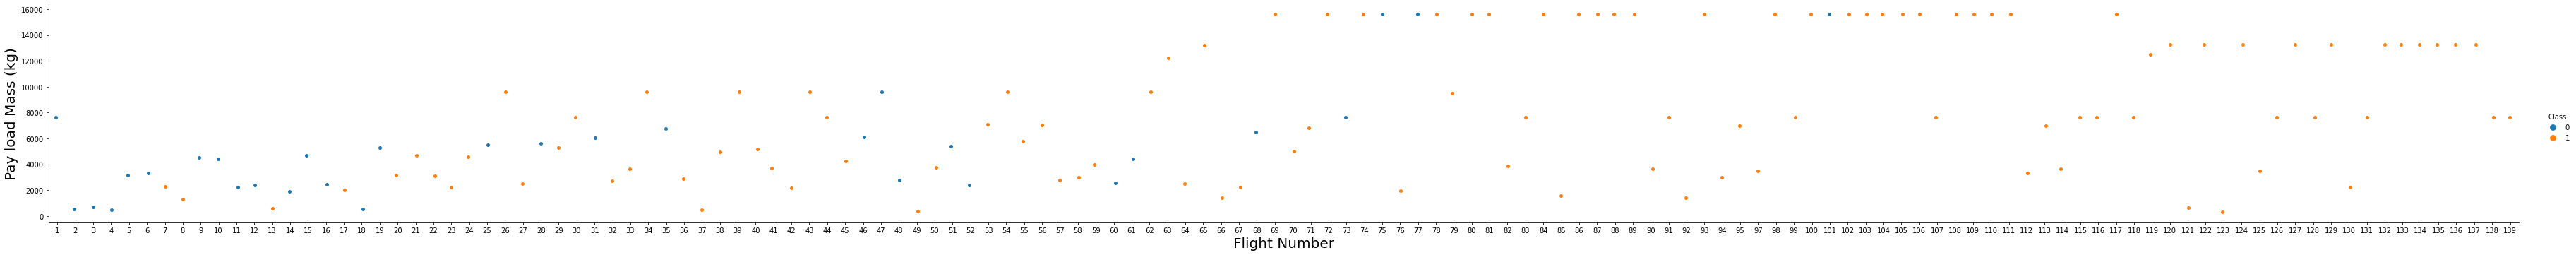

In [8]:
sbn.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=data_falcon9, aspect = 10)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

Next let's visualize the relationship between FlightNumber and LaunchSite - this will give us an idea of how many flights have taken place at each site and their success rates

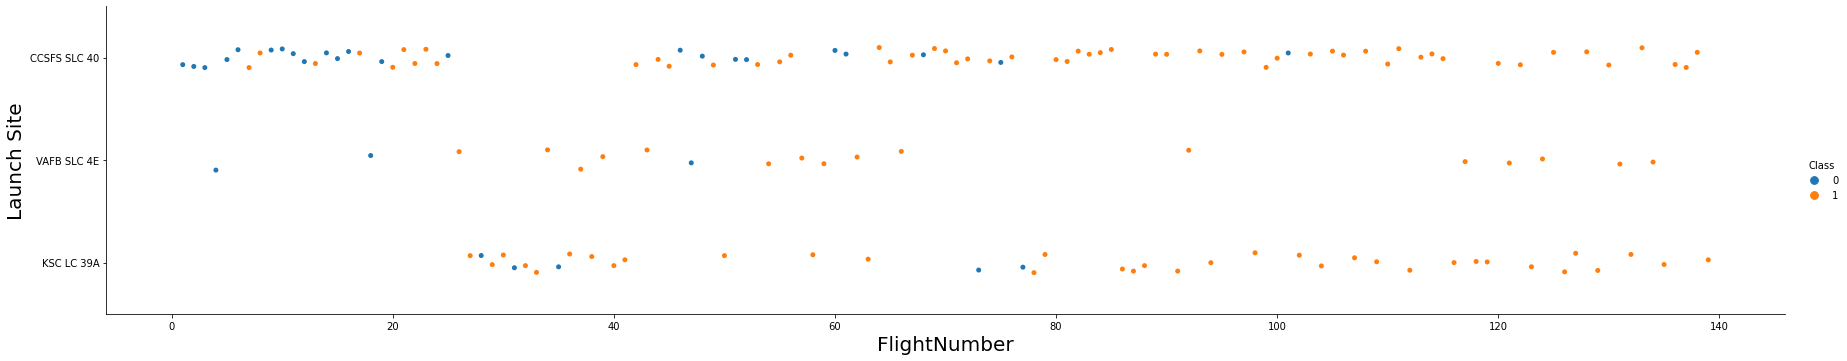

In [9]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
sbn.catplot(y = "LaunchSite", x = "FlightNumber", hue = "Class", data = data_falcon9, aspect = 5)
plt.xlabel("FlightNumber", fontsize = 20)
plt.ylabel("Launch Site", fontsize = 20)
plt.show()

Visualize the relationship between PayloadMass and LaunchSite

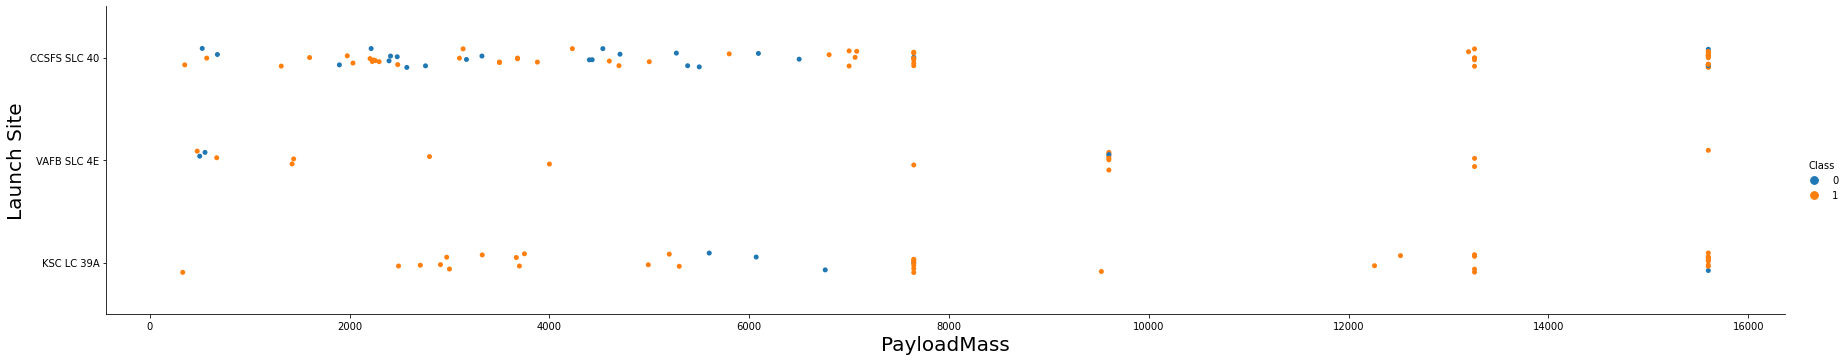

In [10]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
sbn.catplot(y = "LaunchSite", x = "PayloadMass", hue = "Class", data = data_falcon9, aspect = 5)
plt.xlabel("PayloadMass", fontsize = 20)
plt.ylabel("Launch Site", fontsize = 20)
plt.show()

Visualize relationship between the type of Orbit and Success rate

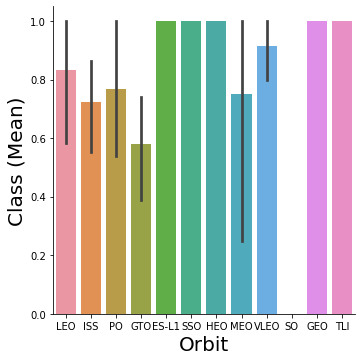

In [11]:
sbn.catplot(x = "Orbit", y = "Class", kind = "bar", data = data_falcon9)
plt.xlabel("Orbit", fontsize = 20)
plt.ylabel("Class (Mean)", fontsize = 20)
plt.show()

FlightNumber vs Orbit type

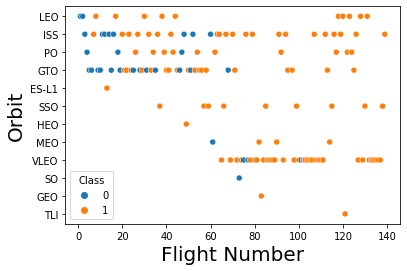

In [14]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
sbn.scatterplot(x = "FlightNumber", y = "Orbit", hue = "Class", data = data_falcon9)
plt.xlabel("Flight Number", fontsize = 20)
plt.ylabel("Orbit", fontsize = 20)
plt.show()

Payload vs Orbit type

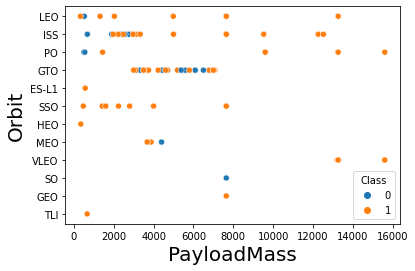

In [15]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value
sbn.scatterplot(x = "PayloadMass", y = "Orbit", hue = "Class", data = data_falcon9)
plt.xlabel("PayloadMass", fontsize = 20)
plt.ylabel("Orbit", fontsize = 20)
plt.show()

Visualize Launch Success Yearly Trend

In [16]:
# A function to Extract years from the date 
year = []
def Extract_year(date):
    for i in data_falcon9["Date"]:
        year.append(i.split("-")[0])
    return year

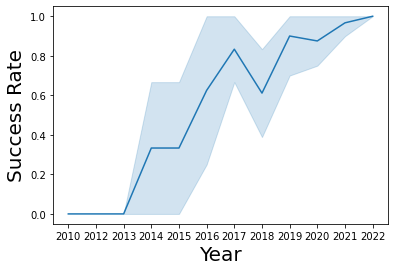

In [17]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
years = []
df_years = data_falcon9.copy()
years = Extract_year(df_years)
df_years["Date"] = years

sbn.lineplot(x = "Date", y = "Class", data = df_years)
plt.xlabel("Year", fontsize = 20)
plt.ylabel("Success Rate", fontsize = 20)
plt.show()

### Feature Engineering

Now that we have explored this data, we can determine the importance of different variables and which should be included in our model. 

In [18]:
features = data_falcon9[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,7647.061885,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [19]:
falcon9_onehot = pd.get_dummies(features, columns = ['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])
falcon9_onehot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1061,Serial_B1062,Serial_B1063,Serial_B1067,Serial_B1069,Serial_B1071
0,1,7647.061885,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,525.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,677.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,500.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,3170.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
falcon9_onehot.astype(float)

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1061,Serial_B1062,Serial_B1063,Serial_B1067,Serial_B1069,Serial_B1071
0,1.0,7647.061885,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,135.0,13260.000000,11.0,1.0,1.0,1.0,5.0,10.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
134,136.0,13260.000000,4.0,1.0,1.0,1.0,5.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
135,137.0,13260.000000,12.0,1.0,1.0,1.0,5.0,11.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
136,138.0,7647.061885,7.0,1.0,1.0,1.0,5.0,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [21]:
#Export one-hot encoded values to csv
falcon9_onehot.to_csv("falcon9_onehot.csv", index = False)